# Assignment 2

In [92]:
import pandas as pd

# Import csv files
train = pd.read_csv("A2-Data_files/TMDB_train.csv")
evaluate = pd.read_csv("A2-Data_files/TMDB_evaluate.csv")
test = pd.read_csv("A2-Data_files/TMDB_test.csv")

print(train.shape)
print(evaluate.shape)
print(test.shape)

(100000, 44)
(20000, 44)
(20000, 42)


In [93]:
# continuous attributes(Non-text attributes)
no_text_features = ['release_year','runtime','budget','revenue','adult','original_language','popularity',
                        'genre_Action','genre_Adventure','genre_Animation','genre_Comedy','genre_Crime','genre_Documentary','genre_Drama','genre_Family',
                        'genre_Fantasy','genre_History','genre_Horror','genre_Music','genre_Mystery','genre_Romance','genre_Science Fiction',
                        'genre_TV Movie','genre_Thriller','genre_War','genre_Western','product_of_Canada','product_of_France','product_of_Germany',
                        'product_of_India','product_of_Italy','product_of_Japan','product_of_Spain','product_of_UK','product_of_USA','product_of_other_countries',
                        'vote_count']
# discrete attributes
text_features = ['title','overview','tagline','production_companies']

print(len(no_text_features))

37


In [94]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Concatenate the 'original_language' column from train, evaluate, and test datasets
all_data = pd.concat([train['original_language'], evaluate['original_language'], test['original_language']])

# Fit the LabelEncoder on the data
label_encoder.fit(all_data)

# Transform the 'original_language' columns in the train, evaluate, and test datasets
train['original_language'] = label_encoder.transform(train['original_language'])
evaluate['original_language'] = label_encoder.transform(evaluate['original_language'])
test['original_language'] = label_encoder.transform(test['original_language'])


## Test 

In [95]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

def test_diff_cls(x_train, y_train, x_eval, y_eval):
    # Define a dictionary to hold the classifiers
    classifiers = {
        "Multinomial Naive Bayes": MultinomialNB(),
        "Logistic Regression": LogisticRegression(max_iter=2000, solver='saga'),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(random_state=807)
    }
    
    # Iterate over the dictionary of classifiers
    for name, classifier in classifiers.items():
        # Fit the classifier on the training data
        classifier.fit(x_train, y_train)
        # Predict the labels on the evaluation set
        y_pred_eval = classifier.predict(x_eval)
        # Calculate the accuracy of the predictions
        accuracy_eval = accuracy_score(y_eval, y_pred_eval)
        # Print the accuracy of the classifier
        print(f"{name} Accuracy Eval: {accuracy_eval}")
        # Print the classification report (precision, recall, f1-score)
        print(classification_report(y_eval, y_pred_eval))


In [96]:
# Split train and test data
# Extract non-text features for training data
X_train_without_text = train[no_text_features]
# Extract text features for training data
X_train_text = train[text_features]
# Extract rating target for training data
y_train_rating = train['average_rate']
# Extract category target for training data
y_train_cate = train['rate_category']

# Extract non-text features for evaluation data
X_eval_without_text = evaluate[no_text_features]
# Extract text features for evaluation data
X_eval_text = evaluate[text_features]
# Extract rating target for evaluation data
y_eval_rating = evaluate['average_rate']
# Extract category target for evaluation data
y_eval_cate = evaluate['rate_category']

# Extract non-text features for test data
X_test_without_text = test[no_text_features]
# Extract text features for test data
X_test_text = test[text_features]


## The results of MNB LR DT RF (all train data)

In [97]:
# model without text feature
test_diff_cls(X_train_without_text, y_train_cate, X_eval_without_text, y_eval_cate)

Multinomial Naive Bayes Accuracy Eval: 0.1172
              precision    recall  f1-score   support

           0       0.12      0.99      0.21      2184
           1       0.07      0.00      0.01      2829
           2       0.28      0.01      0.02      5119
           3       0.49      0.01      0.02      5420
           4       0.35      0.01      0.03      2791
           5       0.04      0.02      0.02      1657

    accuracy                           0.12     20000
   macro avg       0.22      0.17      0.05     20000
weighted avg       0.28      0.12      0.04     20000

Logistic Regression Accuracy Eval: 0.26245
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2184
           1       0.00      0.00      0.00      2829
           2       0.26      0.05      0.08      5119
           3       0.27      0.91      0.41      5420
           4       0.36      0.02      0.03      2791
           5       0.03      0.01      0.01

/opt/anaconda3/envs/IMLa1/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/IMLa1/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/IMLa1/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision Tree Accuracy Eval: 0.6576
              precision    recall  f1-score   support

           0       0.63      0.65      0.64      2184
           1       0.63      0.63      0.63      2829
           2       0.66      0.67      0.67      5119
           3       0.70      0.69      0.69      5420
           4       0.64      0.62      0.63      2791
           5       0.64      0.63      0.63      1657

    accuracy                           0.66     20000
   macro avg       0.65      0.65      0.65     20000
weighted avg       0.66      0.66      0.66     20000

Random Forest Accuracy Eval: 0.6933
              precision    recall  f1-score   support

           0       0.67      0.69      0.68      2184
           1       0.71      0.62      0.66      2829
           2       0.66      0.72      0.69      5119
           3       0.70      0.75      0.73      5420
           4       0.77      0.62      0.69      2791
           5       0.69      0.67      0.68      1657

    a

## The results of MNB LR DT RF (different amount of train data)

Using the `train_test_split` to divide smaller training data.

Because the `train_test_split` will automatically divides the training set and the test set, I merge the training and evaluation data.

In [98]:
def test_diff_cls2(x_train, y_train, x_eval, y_eval):
    # Define a dictionary to store different classifiers
    classifiers = {
        "Multinomial Naive Bayes": MultinomialNB(),  # Naive Bayes classifier for multinomial models
        "Logistic Regression": LogisticRegression(max_iter=5000, solver='saga'),  # Logistic Regression with increased max_iter for convergence
        "Decision Tree": DecisionTreeClassifier(),  # Decision tree classifier for a non-linear model
        "Random Forest": RandomForestClassifier(random_state=807)  # Random Forest classifier with a specific random state for reproducibility
    }
    
    # Iterate through the classifiers
    for name, classifier in classifiers.items():
        # Train the classifier on the training data
        classifier.fit(x_train, y_train)
        # Predict the labels on the evaluation data
        y_pred_eval = classifier.predict(x_eval)
        # Calculate the accuracy of the predictions
        accuracy_eval = accuracy_score(y_eval, y_pred_eval)
        # Print the accuracy of each classifier
        print(f"{name} Accuracy Eval: {accuracy_eval}")

In [99]:
from sklearn.model_selection import train_test_split
import numpy as np


# Merge training file and evaluation file data 
## Merge attributes 
all_X_without_text = np.vstack([X_train_without_text, X_eval_without_text])
## Merge labels
all_y_cate = np.concatenate([y_train_cate, y_eval_cate])

# only data in train file(1000)
X1_train,X1_test,y1_train,y1_test= train_test_split(X_train_without_text, y_train_cate, train_size=0.01, stratify=y_train_cate)
# data in train and evaluation file(1200)
X2_train,X2_test,y2_train,y2_test= train_test_split(all_X_without_text, all_y_cate, train_size=0.01, stratify=all_y_cate)

print("1% training data")
test_diff_cls2(X1_train,y1_train,X1_test,y1_test)
print("------")
test_diff_cls2(X2_train,y2_train,X2_test,y2_test)
print("------------")
# only data in train file(5000)
X4_train,X4_test,y4_train,y4_test= train_test_split(X_train_without_text, y_train_cate, train_size=0.05, stratify=y_train_cate)
# data in train and evaluation file(6000)
X3_train,X3_test,y3_train,y3_test= train_test_split(all_X_without_text, all_y_cate, train_size=0.05, stratify=all_y_cate)

print("5% training data")
test_diff_cls2(X4_train,y4_train,X4_test,y4_test)
print("------")
test_diff_cls2(X3_train,y3_train,X3_test,y3_test)
print("------------")
# only data in train file(1000)
X5_train,X5_test,y5_train,y5_test= train_test_split(X_train_without_text, y_train_cate, train_size=0.01, stratify=y_train_cate)
# data in train and evaluation file(12000)
X6_train,X6_test,y6_train,y6_test= train_test_split(all_X_without_text, all_y_cate, train_size=0.01, stratify=all_y_cate)

print("10% training data")
test_diff_cls2(X5_train,y5_train,X5_test,y5_test)
print("------")
test_diff_cls2(X6_train,y6_train,X6_test,y6_test)
print("------------")
# only data in train file(15000)
X7_train,X7_test,y7_train,y7_test= train_test_split(X_train_without_text, y_train_cate, train_size=0.15, stratify=y_train_cate)
# data in train and evaluation file(18000)
X8_train,X8_test,y8_train,y8_test= train_test_split(all_X_without_text, all_y_cate, train_size=0.15, stratify=all_y_cate)

print("15% training data")
test_diff_cls2(X7_train,y7_train,X7_test,y7_test)
print("------")
test_diff_cls2(X8_train,y8_train,X8_test,y8_test)
print("------------")

1% training data
Multinomial Naive Bayes Accuracy Eval: 0.10067676767676767
Logistic Regression Accuracy Eval: 0.2652828282828283
Decision Tree Accuracy Eval: 0.2543030303030303
Random Forest Accuracy Eval: 0.31297979797979797
------
Multinomial Naive Bayes Accuracy Eval: 0.12441919191919192
Logistic Regression Accuracy Eval: 0.26562289562289565
Decision Tree Accuracy Eval: 0.26631313131313133
Random Forest Accuracy Eval: 0.32036195286195285
------------
5% training data
Multinomial Naive Bayes Accuracy Eval: 0.11730526315789473
Logistic Regression Accuracy Eval: 0.26182105263157895
Decision Tree Accuracy Eval: 0.2824315789473684
Random Forest Accuracy Eval: 0.34216842105263157
------
Multinomial Naive Bayes Accuracy Eval: 0.11670175438596492
Logistic Regression Accuracy Eval: 0.26135087719298244
Decision Tree Accuracy Eval: 0.2902017543859649
Random Forest Accuracy Eval: 0.3520526315789474
------------
10% training data
Multinomial Naive Bayes Accuracy Eval: 0.10352525252525252


/opt/anaconda3/envs/IMLa1/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Accuracy Eval: 0.2693232323232323
Decision Tree Accuracy Eval: 0.2785353535353535
Random Forest Accuracy Eval: 0.31803030303030305
------
Multinomial Naive Bayes Accuracy Eval: 0.0998989898989899
Logistic Regression Accuracy Eval: 0.2653956228956229
Decision Tree Accuracy Eval: 0.27585016835016835
Random Forest Accuracy Eval: 0.32807239057239057
------------
15% training data
Multinomial Naive Bayes Accuracy Eval: 0.11644705882352942
Logistic Regression Accuracy Eval: 0.2616823529411765
Decision Tree Accuracy Eval: 0.2928
Random Forest Accuracy Eval: 0.3604
------
Multinomial Naive Bayes Accuracy Eval: 0.11683333333333333
Logistic Regression Accuracy Eval: 0.2670196078431373
Decision Tree Accuracy Eval: 0.3140980392156863
Random Forest Accuracy Eval: 0.37641176470588233
------------


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np


# Merge training file and evaluation file data 
## Merge attributes 
all_X_without_text = np.vstack([X_train_without_text, X_eval_without_text])
## Merge labels
all_y_cate = np.concatenate([y_train_cate, y_eval_cate])

# only data in train file(1000)



## NB

In [228]:
# Define a list of different training set sizes as fractions of the original dataset
K_rate = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8]
# Iterate through each fraction to create a training set of different sizes
for k in K_rate:
    # Split the dataset into training and testing sets based on the fraction k
    X1_train, X1_test, y1_train, y1_test = train_test_split(
    X_train_without_text, y_train_cate, train_size=k, stratify=y_train_cate) 
    # Initialize the Multinomial Naive Bayes classifier
    classifier = MultinomialNB()   
    # Train the classifier on the training set
    classifier.fit(X1_train, y1_train)   
    # Predict the labels on the testing set
    y_pred_eval = classifier.predict(X1_test)    
    # Calculate the accuracy of the classifier on the testing set
    accuracy_eval = accuracy_score(y1_test, y_pred_eval)   
    # Print the accuracy of the classifier
    print(f"{k} Accuracy Eval: {accuracy_eval}")   
    # Generate and print a classification report that includes precision, recall, and F1-score
    print(classification_report(y1_test, y_pred_eval))

0.01Accuracy Eval: 0.11454545454545455
              precision    recall  f1-score   support

           0       0.12      0.99      0.21     10810
           1       0.06      0.00      0.01     14005
           2       0.24      0.01      0.01     25339
           3       0.47      0.00      0.01     26829
           4       0.28      0.01      0.02     13816
           5       0.04      0.02      0.02      8201

    accuracy                           0.11     99000
   macro avg       0.20      0.17      0.05     99000
weighted avg       0.25      0.11      0.03     99000

0.01Accuracy Eval: 0.11983838383838384
              precision    recall  f1-score   support

           0       0.12      0.94      0.21     10810
           1       0.07      0.01      0.02     14005
           2       0.24      0.01      0.01     25339
           3       0.46      0.01      0.02     26829
           4       0.24      0.06      0.10     13816
           5       0.04      0.02      0.03      8201


## LR

In [189]:
K_rate = [0.01,0.1,0.2,0.4,0.6,0.8]
for i in K_rate:
    X1_train,X1_test,y1_train,y1_test= train_test_split(X_train_without_text, y_train_cate, train_size=k, stratify=y_train_cate)
    classifier = LogisticRegression(max_iter=5000,solver='saga')
    classifier.fit(X1_train, y1_train)
    y_pred_eval = classifier.predict(X1_test)
    accuracy_eval = accuracy_score(y1_test, y_pred_eval)
    print(f"{k}Accuracy Eval: {accuracy_eval}")
    print(classification_report(y1_test, y_pred_eval))



0.01Accuracy Eval: 0.2620808080808081
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10810
           1       0.00      0.00      0.00     14005
           2       0.28      0.06      0.10     25339
           3       0.27      0.91      0.41     26829
           4       0.00      0.00      0.00     13816
           5       0.04      0.01      0.02      8201

    accuracy                           0.26     99000
   macro avg       0.10      0.16      0.09     99000
weighted avg       0.15      0.26      0.14     99000

0.01Accuracy Eval: 0.2659393939393939
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10810
           1       0.00      0.00      0.00     14005
           2       0.00      0.00      0.00     25339
           3       0.27      0.96      0.42     26829
           4       0.22      0.05      0.08     13816
           5       0.00      0.00      0.00      8201

 

# Output
test different parameters of random forest, use the best one to output results

In [122]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a RandomForestClassifier with a specific random state for reproducibility
clf = RandomForestClassifier(random_state=807)
# Train the classifier on the training data
clf.fit(X_train_without_text, y_train_cate
# Evaluate the classifier on the evaluation set and print the accuracy
print(clf.score(X_eval_without_text, y_eval_cate))
# Predict the categories for the test data
y_pred_test = clf.predict(X_test_without_text)
# Assign the predicted categories back to the test dataset under the column 'rate_category'
test["rate_category"] = y_pred_test
# Prepare the output DataFrame with specific columns
test_out = test[["id", "rate_category"]]
# Save the predictions to a CSV file without the index
test_out.to_csv('test_predictions.csv', index=False)


0.6933


In [143]:
from sklearn.ensemble import RandomForestClassifier
# random forest
clf = RandomForestClassifier(random_state=913)

clf.fit(X_train_without_text, y_train_cate)
print(clf.score(X_eval_without_text, y_eval_cate))
y_pred_test = clf.predict(X_test_without_text)
test["rate_category"] = y_pred_test
test_out = test[["id", "rate_category"]]
test_out.to_csv('test_predictions2.csv', index=False)

0.6919


In [142]:
from sklearn.ensemble import RandomForestClassifier
# random forest
clf = RandomForestClassifier(random_state=845)

clf.fit(X_train_without_text, y_train_cate)
print(clf.score(X_eval_without_text, y_eval_cate))
y_pred_test = clf.predict(X_test_without_text)
test["rate_category"] = y_pred_test
test_out = test[["id", "rate_category"]]
test_out.to_csv('test_predictions3.csv', index=False)

0.69365


In [145]:
from sklearn.ensemble import RandomForestClassifier
# random forest
clf = RandomForestClassifier(random_state=903)

clf.fit(X_train_without_text, y_train_cate)
print(clf.score(X_eval_without_text, y_eval_cate))
y_pred_test = clf.predict(X_test_without_text)
test["rate_category"] = y_pred_test
test_out = test[["id", "rate_category"]]
test_out.to_csv('test_predictions4.csv', index=False)

0.69


In [144]:
from sklearn.ensemble import RandomForestClassifier
# 随机森林
clf = RandomForestClassifier(random_state=103)

clf.fit(X_train_without_text, y_train_cate)
print(clf.score(X_eval_without_text, y_eval_cate))
y_pred_test = clf.predict(X_test_without_text)
test["rate_category"] = y_pred_test
test_out = test[["id", "rate_category"]]
test_out.to_csv('test_predictions5.csv', index=False)

0.69035


In [146]:
from sklearn.ensemble import RandomForestClassifier
# 随机森林
clf = RandomForestClassifier(random_state=618)

clf.fit(X_train_without_text, y_train_cate)
print(clf.score(X_eval_without_text, y_eval_cate))
y_pred_test = clf.predict(X_test_without_text)
test["rate_category"] = y_pred_test
test_out = test[["id", "rate_category"]]
test_out.to_csv('test_predictions6.csv', index=False)

0.69005


# Feature Selection

In [100]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Initialize classifiers
classifiers = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
}

# Define the number of features to select
k_values = [20, 10, 5,3,1]

for k in k_values:
    print(f"\nTop {k} Features:")
    
    # Initialize SelectKBest with ANOVA F-value as the scoring function
    selector = SelectKBest(score_func=f_classif, k=k)
    
    # Fit selector to training data and transform X1_train
    X1_train_selected = selector.fit_transform(X_train_without_text, y_train_cate)
    
    # Get the indices of the selected features
    selected_feature_indices = selector.get_support(indices=True)
    
    # Get the names of the selected features
    selected_feature_names = X_train_without_text.columns[selected_feature_indices]
    print("Selected Features:", selected_feature_names)
    
    # Evaluate classifiers using the selected features
    for name, classifier in classifiers.items():
        # Train classifier on selected features
        classifier.fit(X1_train_selected, y_train_cate)
        
        # Transform X1_test using the same selected features
        # X1_test_selected = X_eval_without_text.iloc[:, selected_feature_indices]
        X1_test_selected = selector.transform(X_eval_without_text)
        
        # Predict labels for X1_test
        y_pred = classifier.predict(X1_test_selected)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_eval_cate, y_pred)
        print(f"{name} Accuracy: {accuracy:.4f}")



Top 20 Features:
Selected Features: Index(['release_year', 'runtime', 'budget', 'revenue', 'adult', 'popularity',
       'genre_Animation', 'genre_Comedy', 'genre_Crime', 'genre_Documentary',
       'genre_Drama', 'genre_Family', 'genre_History', 'genre_Horror',
       'genre_Music', 'genre_Romance', 'genre_Thriller', 'genre_Western',
       'product_of_Japan', 'vote_count'],
      dtype='object')
Multinomial Naive Bayes Accuracy: 0.1172
Gaussian Naive Bayes Accuracy: 0.1224
Logistic Regression Accuracy: 0.2717
Decision Tree Accuracy: 0.6418
KNN Accuracy: 0.4064

Top 10 Features:
Selected Features: Index(['release_year', 'runtime', 'budget', 'adult', 'genre_Comedy',
       'genre_Documentary', 'genre_Drama', 'genre_Horror', 'genre_Music',
       'vote_count'],
      dtype='object')
Multinomial Naive Bayes Accuracy: 0.1300
Gaussian Naive Bayes Accuracy: 0.1263
Logistic Regression Accuracy: 0.2734
Decision Tree Accuracy: 0.6067
KNN Accuracy: 0.4070

Top 5 Features:
Selected Features: In

## Bow

In [101]:
import scipy
# import bow data
X_train_text_concat = scipy.sparse.load_npz('A2-Data_files/TMDB_text_features_bow/train_concat_bow.npz')
X_eval_text_concat = scipy.sparse.load_npz('A2-Data_files/TMDB_text_features_bow/eval_concat_bow.npz')

test_diff_cls(X_train_text_concat, y_train_cate, X_eval_text_concat, y_eval_cate)

Multinomial Naive Bayes Accuracy Eval: 0.27645
              precision    recall  f1-score   support

           0       0.22      0.13      0.16      2184
           1       0.23      0.13      0.17      2829
           2       0.30      0.38      0.33      5119
           3       0.32      0.34      0.33      5420
           4       0.22      0.17      0.19      2791
           5       0.23      0.37      0.28      1657

    accuracy                           0.28     20000
   macro avg       0.25      0.25      0.25     20000
weighted avg       0.27      0.28      0.27     20000

Logistic Regression Accuracy Eval: 0.3065
              precision    recall  f1-score   support

           0       0.28      0.06      0.10      2184
           1       0.27      0.06      0.10      2829
           2       0.30      0.48      0.37      5119
           3       0.32      0.54      0.40      5420
           4       0.28      0.08      0.13      2791
           5       0.32      0.15      0.20

In [102]:
## ONLY TEXT
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

 
X2_train = X_train_text
X2_eval = X_eval_text
X2_test = X_test_text

y_train = train['rate_category']
y_eval = evaluate['rate_category']


# Tokenize the 'title' column using Bag of Words (CountVectorizer)
vectorizer = CountVectorizer(max_features=1000)
# merge training file and evaluation file text data
X_train_bow = vectorizer.fit_transform(X2_train.apply(lambda x: ' '.join(x.astype(str)), axis=1))
X_eval_bow = vectorizer.transform(X2_eval.apply(lambda x: ' '.join(x.astype(str)), axis=1))
X_test_bow = vectorizer.transform(X2_test.apply(lambda x: ' '.join(x.astype(str)), axis=1))

# call classifiers
test_diff_cls(X_train_bow,y_train,X_eval_bow,y_eval)


Multinomial Naive Bayes Accuracy Eval: 0.27645
              precision    recall  f1-score   support

           0       0.22      0.13      0.16      2184
           1       0.23      0.13      0.17      2829
           2       0.30      0.38      0.33      5119
           3       0.32      0.34      0.33      5420
           4       0.22      0.17      0.19      2791
           5       0.23      0.37      0.28      1657

    accuracy                           0.28     20000
   macro avg       0.25      0.25      0.25     20000
weighted avg       0.27      0.28      0.27     20000

Logistic Regression Accuracy Eval: 0.3065
              precision    recall  f1-score   support

           0       0.28      0.06      0.10      2184
           1       0.27      0.06      0.10      2829
           2       0.30      0.48      0.37      5119
           3       0.32      0.54      0.40      5420
           4       0.28      0.08      0.13      2791
           5       0.32      0.15      0.20

In [103]:
# ALL FEATURES
## merge 
all_X_text = np.vstack([X_train_text, X_eval_text])
print(all_X_without_text.shape)
print(all_X_text.shape)

X_all = np.hstack([all_X_without_text,all_X_text])
print(X_all.shape)

(120000, 37)
(120000, 4)
(120000, 41)


In [104]:
# ALL FEATURES
## merge training file and evaluation file text data
all_X_text = np.vstack([X_train_text, X_eval_text])
## merge text and non-text data
X_all = np.hstack([all_X_without_text,all_X_text])
## split data to test the impacts of different amount of data
X9_train,X9_test,y9_train,y9_test= train_test_split(X_all, all_y_cate, train_size=0.8, stratify=all_y_cate)

# convert NumPy arrary to DataFrame
X9_train_df = pd.DataFrame(X9_train)
X9_test_df = pd.DataFrame(X9_test)
# Tokenize the 'title' column using Bag of Words (CountVectorizer)
vectorizer = CountVectorizer(max_features=1000)
X_train_bow = vectorizer.fit_transform(X9_train_df.apply(lambda x: ' '.join(x.astype(str)), axis=1))
X_test_bow = vectorizer.transform(X9_test_df.apply(lambda x: ' '.join(x.astype(str)), axis=1))

test_diff_cls(X_train_bow,y9_train,X_test_bow,y9_test)


Multinomial Naive Bayes Accuracy Eval: 0.281875
              precision    recall  f1-score   support

           0       0.24      0.14      0.18      2621
           1       0.23      0.15      0.18      3395
           2       0.30      0.37      0.33      6143
           3       0.34      0.35      0.34      6504
           4       0.21      0.17      0.19      3349
           5       0.25      0.38      0.30      1988

    accuracy                           0.28     24000
   macro avg       0.26      0.26      0.25     24000
weighted avg       0.28      0.28      0.27     24000

Logistic Regression Accuracy Eval: 0.303125
              precision    recall  f1-score   support

           0       0.26      0.12      0.17      2621
           1       0.25      0.10      0.14      3395
           2       0.29      0.43      0.35      6143
           3       0.33      0.50      0.40      6504
           4       0.22      0.08      0.12      3349
           5       0.32      0.24      0

# TF-IDF

In [105]:
# import data
X_train_text_concat = scipy.sparse.load_npz('A2-Data_files/TMDB_text_features_tfidf/train_concat_tfidf.npz')
X_eval_text_concat = scipy.sparse.load_npz('A2-Data_files/TMDB_text_features_tfidf/eval_concat_tfidf.npz')

test_diff_cls(X_train_text_concat, y_train_cate, X_eval_text_concat, y_eval_cate)

Multinomial Naive Bayes Accuracy Eval: 0.2959
              precision    recall  f1-score   support

           0       0.50      0.00      0.00      2184
           1       0.00      0.00      0.00      2829
           2       0.30      0.42      0.35      5119
           3       0.30      0.65      0.41      5420
           4       0.30      0.01      0.02      2791
           5       0.29      0.15      0.20      1657

    accuracy                           0.30     20000
   macro avg       0.28      0.20      0.16     20000
weighted avg       0.28      0.30      0.22     20000

Logistic Regression Accuracy Eval: 0.3061
              precision    recall  f1-score   support

           0       0.30      0.07      0.11      2184
           1       0.27      0.07      0.11      2829
           2       0.30      0.45      0.36      5119
           3       0.32      0.54      0.40      5420
           4       0.26      0.08      0.13      2791
           5       0.31      0.17      0.22 

In [106]:
## Only Text
from sklearn.feature_extraction.text import TfidfVectorizer

# split training data and test data
X4_train = X_train_text
X4_eval = X_eval_text
X4_test = X_test_text
y_train = train['rate_category']
y_eval = evaluate['rate_category']

# Tokenize the text data using TF-IDF (TfidfVectorizer)
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf= vectorizer.fit_transform(X4_train.apply(lambda x: ' '.join(x.astype(str)), axis=1))
X_eval_tfidf = vectorizer.transform(X4_eval.apply(lambda x: ' '.join(x.astype(str)), axis=1))
X_test_tfidf = vectorizer.transform(X4_test.apply(lambda x: ' '.join(x.astype(str)), axis=1))

test_diff_cls(X_train_tfidf,y_train,X_eval_tfidf,y_eval)

Multinomial Naive Bayes Accuracy Eval: 0.2959
              precision    recall  f1-score   support

           0       0.50      0.00      0.00      2184
           1       0.00      0.00      0.00      2829
           2       0.30      0.42      0.35      5119
           3       0.30      0.65      0.41      5420
           4       0.30      0.01      0.02      2791
           5       0.29      0.15      0.20      1657

    accuracy                           0.30     20000
   macro avg       0.28      0.20      0.16     20000
weighted avg       0.28      0.30      0.22     20000

Logistic Regression Accuracy Eval: 0.3062
              precision    recall  f1-score   support

           0       0.30      0.07      0.11      2184
           1       0.27      0.07      0.11      2829
           2       0.30      0.45      0.36      5119
           3       0.32      0.54      0.40      5420
           4       0.26      0.08      0.13      2791
           5       0.31      0.17      0.22 

In [107]:
#ALL FEATURES
all_X_text = np.vstack([X_train_text, X_eval_text])

X_all = np.hstack([all_X_without_text,all_X_text])

X9_train,X9_test,y9_train,y9_test= train_test_split(X_all, all_y_cate, train_size=0.8, stratify=all_y_cate)

# convert NumPy to DataFrame
X9_train_df = pd.DataFrame(X9_train)
X9_test_df = pd.DataFrame(X9_test)

vectorizer = TfidfVectorizer(max_features=100)
X_train_tfidf = vectorizer.fit_transform(X9_train_df.apply(lambda x: ' '.join(x.astype(str)), axis=1))
X_test_tfidf = vectorizer.transform(X9_test_df.apply(lambda x: ' '.join(x.astype(str)), axis=1))


test_diff_cls(X_train_tfidf,y9_train,X_test_tfidf,y9_test)

Multinomial Naive Bayes Accuracy Eval: 0.27616666666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2621
           1       0.00      0.00      0.00      3395
           2       0.28      0.15      0.20      6143
           3       0.28      0.88      0.42      6504
           4       0.00      0.00      0.00      3349
           5       0.20      0.00      0.00      1988

    accuracy                           0.28     24000
   macro avg       0.13      0.17      0.10     24000
weighted avg       0.16      0.28      0.16     24000

Logistic Regression Accuracy Eval: 0.2805
              precision    recall  f1-score   support

           0       0.26      0.01      0.02      2621
           1       0.31      0.01      0.02      3395
           2       0.28      0.38      0.32      6143
           3       0.28      0.62      0.39      6504
           4       0.18      0.01      0.02      3349
           5       0.29      0.

# Self Training

## BoW

In [181]:
# import unlabeled data
unlabel_data = scipy.sparse.load_npz('A2-Data_files/TMDB_text_features_bow/unlabelled_concat_bow.npz')


In [253]:
from scipy.sparse import vstack

# merge unlabeld data and labeled data
all_used_data = vstack([X_train_text_concat, unlabel_data])
# set unlabeld data -1
all_used_label = y_train_cate.to_list() + [-1] * (unlabel_data.shape[0])
# all_used_label = y_train_cate[:1000].to_list() + [-1] * (unlabel_data.shape[0])

print(len(all_used_label), all_used_data.shape, X_train_text_concat.shape)

354701 (354701, 1000) (100000, 1000)


### test the impacts of different classifier 

In [254]:
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.metrics import classification_report

## test four classifiers
classifiers = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=2000,solver='saga'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=807)
}
    
# Iterate over each classifier defined in the 'classifiers' dictionary
for name, classifier in classifiers.items():
    # Initialize a SelfTrainingClassifier with the current classifier, using 'k_best' as the criterion with 100 best unlabeled samples to label per iteration
    self_training_model = SelfTrainingClassifier(classifier, criterion='k_best', k_best=100) 
    # Fit the self-training model on the combined labeled and unlabeled data
    self_training_model.fit(all_used_data, all_used_label)    
    # Predict the labels for the evaluation set using the trained self-training model
    valid_pred = self_training_model.predict(X_eval_text_concat)    
    # Print the name of the classifier and indicate that this is part of semi-supervised learning evaluation
    print(f"Self Training {name} (Semi supervised Learning)")   
    # Print the classification report including precision, recall, and F1-score for the evaluation predictions
    print(classification_report(y_eval_cate, valid_pred))


Self Training Multinomial Naive Bayes (Semi supervised Learning)
              precision    recall  f1-score   support

           0       0.50      0.00      0.00      2184
           1       0.00      0.00      0.00      2829
           2       0.30      0.42      0.35      5119
           3       0.30      0.64      0.40      5420
           4       0.28      0.01      0.02      2791
           5       0.28      0.18      0.22      1657

    accuracy                           0.30     20000
   macro avg       0.28      0.21      0.17     20000
weighted avg       0.27      0.30      0.22     20000

Self Training Logistic Regression (Semi supervised Learning)
              precision    recall  f1-score   support

           0       0.29      0.07      0.11      2184
           1       0.27      0.07      0.10      2829
           2       0.30      0.45      0.36      5119
           3       0.32      0.54      0.40      5420
           4       0.26      0.08      0.12      2791
      

In [183]:
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.metrics import classification_report

LRclf = LogisticRegression(random_state=666, max_iter=800)

self_training_model = SelfTrainingClassifier(LRclf, criterion='k_best', k_best=100)

self_training_model.fit(all_used_data, all_used_label)

valid_pred = self_training_model.predict(X_eval_text_concat)

print(f"Self Training (Semi supervised Learning)")
print(classification_report(y_eval_cate, valid_pred))

Self Training (Semi supervised Learning)1000 best
              precision    recall  f1-score   support

           0       0.29      0.07      0.11      2184
           1       0.28      0.07      0.11      2829
           2       0.30      0.45      0.36      5119
           3       0.32      0.54      0.40      5420
           4       0.26      0.08      0.13      2791
           5       0.31      0.17      0.22      1657

    accuracy                           0.31     20000
   macro avg       0.29      0.23      0.22     20000
weighted avg       0.29      0.31      0.26     20000



## TF-IDF

In [243]:
# import TFIDF data
unlabel_data_tfidf = scipy.sparse.load_npz('A2-Data_files/TMDB_text_features_tfidf/unlabelled_concat_tfidf.npz')


In [244]:
from scipy.sparse import vstack
print(X_train_text_concat.shape)
print(unlabel_data_tfidf.shape)
#  merge unlabeld data and labeled data
all_used_data = vstack([X_train_text_concat, unlabel_data_tfidf])
# set unlabeld data -1
all_used_label = y_train_cate.to_list() + [-1] * (unlabel_data_tfidf.shape[0])
# all_used_label = y_train_cate[:1000].to_list() + [-1] * (unlabel_data.shape[0])

print(len(all_used_label), all_used_data.shape, X_train_text_concat.shape)

(100000, 1000)
(254701, 1000)
354701 (354701, 1000) (100000, 1000)


### test different data size 

In [245]:
# Define a list of proportions to specify different sizes of training datasets
K_rate = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8]

# Iterate over each proportion in the K_rate list
for k in K_rate:
    # Split the data into training and testing sets based on the proportion 'k'
    # 'train_size=k' sets the proportion of the data to use as the training set
    # 'stratify=all_used_label' ensures that the training and testing sets have similar distributions of labels as the original dataset
    Xs_train, Xs_test, ys_train, ys_test = train_test_split(all_used_data, all_used_label, train_size=k, stratify=all_used_label)


In [111]:
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.metrics import classification_report

# Initialize a logistic regression classifier with specified parameters
LRclf = LogisticRegression(random_state=666, max_iter=800)

# Define the rates at which the training data size will vary
K_rate = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8]

# Loop through each training data size rate
for k in K_rate:
    # Split the dataset into training and testing sets based on the current rate
    Xs_train, Xs_test, ys_train, ys_test = train_test_split(all_used_data, all_used_label, train_size=k, stratify=all_used_label)
    # Initialize the SelfTrainingClassifier with the logistic regression classifier and settings for semi-supervised learning
    self_training_model = SelfTrainingClassifier(LRclf, criterion='k_best', k_best=100)
    # Fit the self-training model on the training data
    self_training_model.fit(Xs_train, ys_train)
    # Predict the labels for the evaluation set
    valid_pred = self_training_model.predict(X_eval_text_concat)
    # Output the results
    print(f"Self Training (Semi supervised Learning) datasize:{k} best")
    print(classification_report(y_eval_cate, valid_pred))


Self Training (Semi supervised Learning) datasize:0.01 best
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2184
           1       0.15      0.00      0.01      2829
           2       0.25      0.60      0.36      5119
           3       0.29      0.41      0.34      5420
           4       0.24      0.00      0.00      2791
           5       0.00      0.00      0.00      1657

    accuracy                           0.27     20000
   macro avg       0.16      0.17      0.12     20000
weighted avg       0.20      0.27      0.19     20000

Self Training (Semi supervised Learning) datasize:0.1 best
              precision    recall  f1-score   support

           0       0.20      0.05      0.08      2184
           1       0.20      0.07      0.10      2829
           2       0.28      0.39      0.33      5119
           3       0.30      0.51      0.38      5420
           4       0.21      0.09      0.13      2791
           5 

In [246]:
Xl_train,Xl_test,yl_train,yl_test= train_test_split(X_train_text_concat, y_train_cate, train_size=0.05, stratify=y_train_cate)

print(X_train_text_concat.shape)
print(Xl_train.shape)
print(unlabel_data_tfidf.shape)

(100000, 1000)
(5000, 1000)
(254701, 1000)


### test different labeled data size

In [249]:
from scipy.sparse import vstack

NBclf = MultinomialNB()
K_rate = [0.01,0.1,0.2,0.4,0.6,0.8]
for k in K_rate:
    Xl_train,Xl_test,yl_train,yl_test= train_test_split(X_train_text_concat, y_train_cate, train_size=0.05, stratify=y_train_cate)
    #  merge unlabeld data and labeled data
    all_used_data = vstack([Xl_train, unlabel_data_tfidf])
    # set unlabeld data -1
    all_used_label = yl_train.to_list() + [-1] * (unlabel_data_tfidf.shape[0])

    # self training
    self_training_model = SelfTrainingClassifier(NBclf, criterion='k_best', k_best=100)
    self_training_model.fit(all_used_data, all_used_label)
    valid_pred = self_training_model.predict(X_eval_text_concat)
    print(f"Self Training (Semi supervised Learning) datasize:{k} best")
    print(classification_report(y_eval_cate, valid_pred))


Self Training (Semi supervised Learning) datasize:0.01 best
              precision    recall  f1-score   support

           0       0.50      0.00      0.01      2184
           1       0.21      0.00      0.01      2829
           2       0.28      0.45      0.35      5119
           3       0.29      0.55      0.38      5420
           4       0.27      0.01      0.02      2791
           5       0.26      0.18      0.21      1657

    accuracy                           0.28     20000
   macro avg       0.30      0.20      0.16     20000
weighted avg       0.29      0.28      0.21     20000

Self Training (Semi supervised Learning) datasize:0.1 best
              precision    recall  f1-score   support

           0       0.38      0.00      0.00      2184
           1       0.16      0.00      0.01      2829
           2       0.28      0.45      0.34      5119
           3       0.28      0.54      0.37      5420
           4       0.29      0.01      0.02      2791
           5 

In [113]:
from scipy.sparse import vstack

K_rate = [0.01,0.1,0.2,0.4,0.6,0.8]
for k in K_rate:
    Xl_train,Xl_test,yl_train,yl_test= train_test_split(X_train_text_concat, y_train_cate, train_size=k, stratify=y_train_cate)
    #  merge unlabeld data and labeled data
    all_used_data = vstack([Xl_train, unlabel_data])
    # set unlabeld data -1
    all_used_label = yl_train.to_list() + [-1] * (unlabel_data.shape[0])

    # self training
    self_training_model = SelfTrainingClassifier(LRclf, criterion='k_best', k_best=100)
    self_training_model.fit(all_used_data, all_used_label)
    valid_pred = self_training_model.predict(X_eval_text_concat)
    print(f"Self Training (Semi supervised Learning) datasize:{k} best")
    print(classification_report(y_eval_cate, valid_pred))


Self Training (Semi supervised Learning) datasize:0.01 best
              precision    recall  f1-score   support

           0       0.07      0.00      0.00      2184
           1       0.21      0.01      0.03      2829
           2       0.27      0.40      0.32      5119
           3       0.27      0.59      0.37      5420
           4       0.21      0.02      0.03      2791
           5       0.18      0.01      0.01      1657

    accuracy                           0.27     20000
   macro avg       0.20      0.17      0.13     20000
weighted avg       0.22      0.27      0.19     20000

Self Training (Semi supervised Learning) datasize:0.1 best
              precision    recall  f1-score   support

           0       0.21      0.05      0.08      2184
           1       0.20      0.09      0.13      2829
           2       0.28      0.40      0.33      5119
           3       0.30      0.48      0.37      5420
           4       0.22      0.10      0.14      2791
           5 

### test different parameter k value

In [114]:
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.metrics import classification_report

# Initialize a logistic regression classifier with specified random state and maximum iterations
LRclf = LogisticRegression(random_state=666, max_iter=800)
# Define a list of k values to specify how many of the best unlabeled instances to label per iteration
K_values = [2, 5, 10, 100, 1000]
# Loop through each value in K_values to test different amounts of unlabeled data being labeled
for k in K_values:
    # Create a SelfTrainingClassifier using logistic regression as the base and varying k_best
    self_training_model = SelfTrainingClassifier(LRclf, criterion='k_best', k_best=k)
    # Fit the self-training model on the mixed dataset of labeled and unlabeled data
    self_training_model.fit(all_used_data, all_used_label)
    # Use the trained model to predict labels for the evaluation set
    valid_pred = self_training_model.predict(X_eval_text_concat)
    # Print the performance of the model for the current k value
    print(f"Self Training (Semi supervised Learning) {k} best")
    print(classification_report(y_eval_cate, valid_pred))


Self Training (Semi supervised Learning)2 best
              precision    recall  f1-score   support

           0       0.28      0.07      0.11      2184
           1       0.26      0.07      0.11      2829
           2       0.30      0.45      0.36      5119
           3       0.32      0.53      0.40      5420
           4       0.26      0.09      0.14      2791
           5       0.30      0.17      0.22      1657

    accuracy                           0.30     20000
   macro avg       0.29      0.23      0.22     20000
weighted avg       0.29      0.30      0.26     20000

Self Training (Semi supervised Learning)5 best
              precision    recall  f1-score   support

           0       0.28      0.07      0.11      2184
           1       0.26      0.07      0.10      2829
           2       0.30      0.45      0.36      5119
           3       0.32      0.53      0.40      5420
           4       0.26      0.09      0.14      2791
           5       0.30      0.17     

In [115]:
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.metrics import classification_report

classifiers = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=2000,solver='saga'),
    # "Decision Tree": DecisionTreeClassifier(),
    # "Random Forest": RandomForestClassifier(random_state=807)
}
    
for name, classifier in classifiers.items():
    self_training_model = SelfTrainingClassifier(classifier, criterion='k_best', k_best=100)
    self_training_model.fit(all_used_data, all_used_label)  
    valid_pred = self_training_model.predict(X_eval_text_concat)

    print(f"Self Training {name} (Semi supervised Learning)")
    print(classification_report(y_eval_cate, valid_pred))


Self Training Multinomial Naive Bayes (Semi supervised Learning)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2184
           1       0.00      0.00      0.00      2829
           2       0.30      0.42      0.35      5119
           3       0.30      0.63      0.40      5420
           4       0.29      0.02      0.03      2791
           5       0.28      0.18      0.22      1657

    accuracy                           0.30     20000
   macro avg       0.19      0.21      0.17     20000
weighted avg       0.22      0.30      0.22     20000

Self Training Logistic Regression (Semi supervised Learning)
              precision    recall  f1-score   support

           0       0.28      0.07      0.11      2184
           1       0.26      0.07      0.10      2829
           2       0.30      0.45      0.36      5119
           3       0.32      0.53      0.40      5420
           4       0.25      0.08      0.13      2791
      

### test different classifiers

In [255]:
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.metrics import classification_report

classifiers = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=2000,solver='saga'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=807)
}
    
for name, classifier in classifiers.items():
    self_training_model = SelfTrainingClassifier(classifier, criterion='k_best', k_best=100)
    self_training_model.fit(all_used_data, all_used_label)  
    valid_pred = self_training_model.predict(X_eval_text_concat)

    print(f"Self Training {name} (Semi supervised Learning)")
    print(classification_report(y_eval_cate, valid_pred))

Self Training Multinomial Naive Bayes (Semi supervised Learning)
              precision    recall  f1-score   support

           0       0.50      0.00      0.00      2184
           1       0.00      0.00      0.00      2829
           2       0.30      0.42      0.35      5119
           3       0.30      0.64      0.40      5420
           4       0.28      0.01      0.02      2791
           5       0.28      0.18      0.22      1657

    accuracy                           0.30     20000
   macro avg       0.28      0.21      0.17     20000
weighted avg       0.27      0.30      0.22     20000

Self Training Logistic Regression (Semi supervised Learning)
              precision    recall  f1-score   support

           0       0.29      0.07      0.11      2184
           1       0.27      0.07      0.10      2829
           2       0.30      0.45      0.36      5119
           3       0.32      0.54      0.40      5420
           4       0.26      0.08      0.12      2791
      

# Evaluation

In [116]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, GaussianNB


X_all = np.concatenate(( X_train_text_concat.toarray(), X_train_without_text.to_numpy()), axis=1)
print(X_all.shape)

def test_diff_cls(x_train, y_train, x_eval, y_eval):

    classifiers = {
        "Multinomial Naive Bayes": MultinomialNB(),
        "Logistic Regression": LogisticRegression(max_iter=2000,solver='saga'),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(random_state=807)
    }
    
    for name, classifier in classifiers.items():
        classifier.fit(x_train, y_train)
        y_pred_eval = classifier.predict(x_eval)
        print(f"{name} classification report")

        print(classification_report(y_eval_cate, y_pred_eval))



NBclf = MultinomialNB(alpha=0.1)
NBclf.fit(X_train_text_concat, y_train_cate)
y_pred_eval = NBclf.predict(X_eval_text_concat)

print("tfidf MultinomialNB Naive Bayes")
print(classification_report(y_eval_cate, y_pred_eval))


(100000, 1037)
tfidf MultinomialNB Naive Bayes
              precision    recall  f1-score   support

           0       0.50      0.00      0.00      2184
           1       0.00      0.00      0.00      2829
           2       0.30      0.42      0.35      5119
           3       0.30      0.64      0.41      5420
           4       0.27      0.01      0.02      2791
           5       0.29      0.15      0.20      1657

    accuracy                           0.30     20000
   macro avg       0.28      0.20      0.16     20000
weighted avg       0.27      0.30      0.22     20000



# Baseline

## Zero R

In [117]:
from sklearn.dummy import DummyClassifier
# Initialize a DummyClassifier with the strategy to always predict the most frequent class
ZEROclf = DummyClassifier(strategy="most_frequent")
# Fit the DummyClassifier on the training data
ZEROclf.fit(X_train_text_concat, y_train_cate)
# Use the trained classifier to make predictions on the evaluation data
y_pred_eval = ZEROclf.predict(X_eval_text_concat)
# Print the name of the baseline for clarity
print("Zero Rule baseline")
# Print the classification report to evaluate the model's performance
print(classification_report(y_eval_cate, y_pred_eval))

Zero Rule baseline
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2184
           1       0.00      0.00      0.00      2829
           2       0.00      0.00      0.00      5119
           3       0.27      1.00      0.43      5420
           4       0.00      0.00      0.00      2791
           5       0.00      0.00      0.00      1657

    accuracy                           0.27     20000
   macro avg       0.05      0.17      0.07     20000
weighted avg       0.07      0.27      0.12     20000



### zero-r bow

In [147]:
from sklearn.dummy import DummyClassifier
ZEROclf = DummyClassifier(strategy="most_frequent")
ZEROclf.fit(X_train_bow, y9_train)

y_pred_eval = ZEROclf.predict(X_test_bow)

print("Zero Rule baseline")
print(classification_report(y9_test, y_pred_eval))

Zero Rule baseline
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2621
           1       0.00      0.00      0.00      3395
           2       0.00      0.00      0.00      6143
           3       0.27      1.00      0.43      6504
           4       0.00      0.00      0.00      3349
           5       0.00      0.00      0.00      1988

    accuracy                           0.27     24000
   macro avg       0.05      0.17      0.07     24000
weighted avg       0.07      0.27      0.12     24000



### zero-r tfidf

In [154]:
from sklearn.dummy import DummyClassifier
ZEROclf = DummyClassifier(strategy="most_frequent")
ZEROclf.fit(X_train_tfidf, y9_train)

y_pred_eval = ZEROclf.predict(X_test_tfidf)

print("Zero Rule baseline")
print(classification_report(y9_test, y_pred_eval))

Zero Rule baseline
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2621
           1       0.00      0.00      0.00      3395
           2       0.00      0.00      0.00      6143
           3       0.27      1.00      0.43      6504
           4       0.00      0.00      0.00      3349
           5       0.00      0.00      0.00      1988

    accuracy                           0.27     24000
   macro avg       0.05      0.17      0.07     24000
weighted avg       0.07      0.27      0.12     24000



## Random R

In [118]:
# Initialize a DummyClassifier with the strategy to predict uniformly at random
RANDOMclf = DummyClassifier(strategy="uniform")
# Fit the DummyClassifier on the training data with text features
RANDOMclf.fit(X_train_text_concat, y_train_cate)
# Use the trained classifier to make predictions on the evaluation data
y_pred_eval = RANDOMclf.predict(X_eval_text_concat)
# Print the name of the baseline and the classification report to evaluate the model's performance
print("Random baseline")
print(classification_report(y_eval_cate, y_pred_eval))

# Re-fit the classifier on the training data
RANDOMclf.fit(X_train_text_concat, y_train_cate)
# Calculate and print the accuracy of the classifier on the evaluation data
random_score = RANDOMclf.score(X_eval_text_concat, y_eval_cate)
print("Random baseline accuracy 1:", random_score)

# Calculate the accuracy of the classifier multiple times to estimate its average performance
random_scores = []
for _ in range(10):  # Loop to calculate the accuracy ten times
    RANDOMclf.fit(X_train_text_concat, y_train_cate)
    random_scores.append(RANDOMclf.score(X_eval_text_concat, y_eval_cate))
print("Random baseline accuracy 10:", sum(random_scores) / 10.)

Random baseline
              precision    recall  f1-score   support

           0       0.11      0.16      0.13      2184
           1       0.14      0.16      0.15      2829
           2       0.26      0.16      0.20      5119
           3       0.27      0.16      0.20      5420
           4       0.14      0.17      0.15      2791
           5       0.08      0.15      0.10      1657

    accuracy                           0.16     20000
   macro avg       0.16      0.16      0.16     20000
weighted avg       0.19      0.16      0.17     20000

Random baseline accuracy 1: 0.16665
Random baseline accuracy 10: 0.167885


### random bow

In [156]:
RANDOMclf = DummyClassifier(strategy="uniform")

RANDOMclf.fit(X_train_bow, y9_train)

y_pred_eval = RANDOMclf.predict(X_test_bow)

print("Random baseline")
print(classification_report(y9_test, y_pred_eval))

RANDOMclf.fit(X_train_text_concat, y_train_cate)
random_score = RANDOMclf.score(X_eval_text_concat, y_eval_cate)
print("Random baseline accuracy 1:", random_score)

# 测量十次求平均值
random_scores = []
for _ in range(10):
    RANDOMclf.fit(X_train_text_concat, y_train_cate)
    random_scores.append(RANDOMclf.score(X_eval_text_concat, y_eval_cate))
print("Random baseline accuracy 10:", sum(random_scores) / 10.)

Random baseline
              precision    recall  f1-score   support

           0       0.11      0.17      0.13      2621
           1       0.15      0.18      0.16      3395
           2       0.25      0.16      0.20      6143
           3       0.27      0.17      0.21      6504
           4       0.14      0.17      0.15      3349
           5       0.08      0.16      0.11      1988

    accuracy                           0.17     24000
   macro avg       0.17      0.17      0.16     24000
weighted avg       0.20      0.17      0.17     24000

Random baseline accuracy 1: 0.1624
Random baseline accuracy 10: 0.16702


### random tfidf

In [155]:
RANDOMclf = DummyClassifier(strategy="uniform")

RANDOMclf.fit(X_train_tfidf, y9_train)

y_pred_eval = RANDOMclf.predict(X_test_tfidf)

print("Random baseline")
print(classification_report(y9_test, y_pred_eval))

RANDOMclf.fit(X_train_text_concat, y_train_cate)
random_score = RANDOMclf.score(X_eval_text_concat, y_eval_cate)
print("Random baseline accuracy 1:", random_score)

# 测量十次求平均值
random_scores = []
for _ in range(10):
    RANDOMclf.fit(X_train_text_concat, y_train_cate)
    random_scores.append(RANDOMclf.score(X_eval_text_concat, y_eval_cate))
print("Random baseline accuracy 10:", sum(random_scores) / 10.)

Random baseline
              precision    recall  f1-score   support

           0       0.11      0.16      0.13      2621
           1       0.14      0.16      0.15      3395
           2       0.26      0.17      0.20      6143
           3       0.27      0.17      0.21      6504
           4       0.14      0.16      0.15      3349
           5       0.08      0.17      0.11      1988

    accuracy                           0.17     24000
   macro avg       0.17      0.17      0.16     24000
weighted avg       0.20      0.17      0.17     24000

Random baseline accuracy 1: 0.16305
Random baseline accuracy 10: 0.166925


# Output Picture

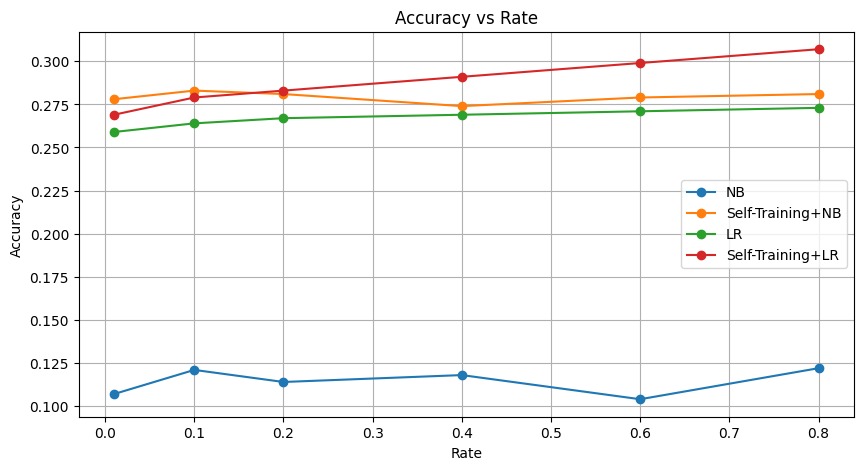

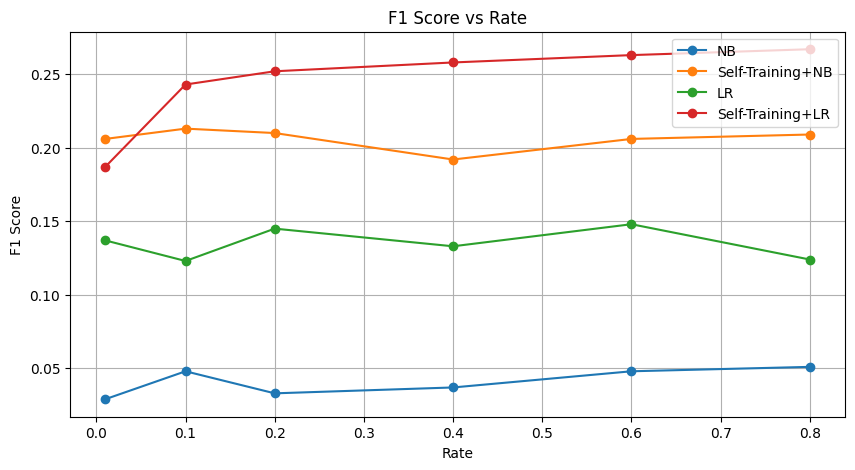

In [250]:
import matplotlib.pyplot as plt

# 数据
rates = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8]

# 精度数据
acc_nb = [0.107, 0.121, 0.114, 0.118, 0.104, 0.122]
acc_self_training_nb = [0.278, 0.283, 0.281, 0.274, 0.279, 0.281]
acc_lr = [0.259, 0.264, 0.267, 0.269, 0.271, 0.273]
acc_self_training_lr = [0.269, 0.279, 0.283, 0.291, 0.299, 0.307]

# F1 数据
f1_nb = [0.029, 0.048, 0.033, 0.037, 0.048, 0.051]
f1_self_training_nb = [0.206, 0.213, 0.210, 0.192, 0.206, 0.209]
f1_lr = [0.137, 0.123, 0.145, 0.133, 0.148, 0.124]
f1_self_training_lr = [0.187, 0.243, 0.252, 0.258, 0.263, 0.267]

# 绘制精度图
plt.figure(figsize=(10, 5))
plt.plot(rates, acc_nb, marker='o', label='NB')
plt.plot(rates, acc_self_training_nb, marker='o', label='Self-Training+NB')
plt.plot(rates, acc_lr, marker='o', label='LR')
plt.plot(rates, acc_self_training_lr, marker='o', label='Self-Training+LR')
plt.title('Accuracy vs Rate')
plt.xlabel('Rate')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 绘制 F1 分数图
plt.figure(figsize=(10, 5))
plt.plot(rates, f1_nb, marker='o', label='NB')
plt.plot(rates, f1_self_training_nb, marker='o', label='Self-Training+NB')
plt.plot(rates, f1_lr, marker='o', label='LR')
plt.plot(rates, f1_self_training_lr, marker='o', label='Self-Training+LR')
plt.title('F1 Score vs Rate')
plt.xlabel('Rate')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()
